In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [421]:
df=pd.read_csv('credit_scoring.csv')

| Variable Name                  | Description                                                                 | Type       |
|--------------------------------|-----------------------------------------------------------------------------|------------|
| Default                        | Client with more than 90 days without paying their loan                     | Y/N        |
| Prct_uso_tc                    | Percentage of credit card usage in the last month                           | percentage |
| Edad                           | Age                                                                         | integer    |
| Nro_prestamo_retrasados        | Number of loans with payment delays of more than 3 months in the last 3 years | integer    |
| Prct_deuda_vs_ingresos         | Financial debt-to-income ratio                                              | percentage |
| Mto_ingreso_mensual            | Monthly income amount                                                       | real       |
| Nro_prod_financieros_deuda     | Number of loans (including vehicle or mortgage loans) and number of credit cards last year | integer |
| Nro_retraso_60dias             | Number of times the client has been over 60 days late in the last 3 years    | integer    |
| Nro_creditos_hipotecarios      | Number of mortgage loans                                                    | integer    |
| Nro_retraso_ultm3anios         | Number of payment delays over 30 days in the last 3 years                   | integer    |
| Nro_dependiente                | Number of dependents                                                        | integer    |


In [422]:
df.head(5)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [423]:
df['Nro_prestao_retrasados'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Nro_prestao_retrasados, dtype: float64

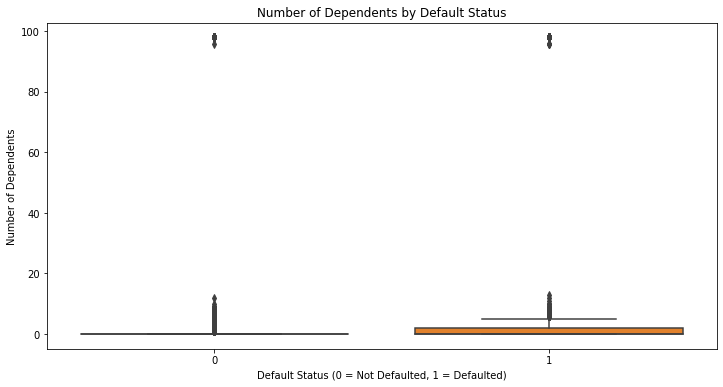

In [409]:
# Box plot for Number of Dependents by Default Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Nro_prestao_retrasados', data=df)
plt.title("Number of Dependents by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Number of Dependents")
plt.show()


In [350]:
df.columns

Index(['ID', 'Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [351]:
# df.rename(columns={
#     'Prct_uso_tc': 'per_credit_card_usage',
#     'Edad': 'age',
#     'Nro_prestao_retrasados': 'No_loans_3mts_3yrs',
#     'Prct_deuda_vs_ingresos': 'debt_to_income',
#     'Mto_ingreso_mensual': 'monthly_income',
#     'Nro_prod_financieros_deuda': 'number_loans_and_credit_cards',
#     'Nro_retraso_60dias':'60days_late_3yrs',
#     'Nro_creditos_hipotecarios':'mortgage_loans',
#     'Nro_retraso_ultm3anios':'pay_delays_30ds_3yrs',
#     'Nro_dependiente':'number_dependent'
# }, inplace=True)

In [352]:
# df[['Default','age','debt_to_income']]

In [353]:
df[['Default','Edad','Nro_prod_financieros_deuda','Nro_creditos_hipotecarios','Nro_dependiente']][df['Default']==1].head(10)

,Default,Edad,Nro_prod_financieros_deuda,Nro_creditos_hipotecarios,Nro_dependiente
0,1,45,13,6,2.0
13,1,40,9,1,2.0
21,1,38,7,1,2.0
25,1,50,14,3,1.0
51,1,31,10,2,1.0
74,1,49,9,2,3.0
88,1,45,13,2,2.0
162,1,47,6,2,1.0
179,1,35,6,1,1.0
184,1,51,11,1,0.0


In [363]:
df = df[df['ID'] != 65696]

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ID                          149999 non-null  int64   
 1   Default                     149999 non-null  int64   
 2   Prct_uso_tc                 149999 non-null  float64 
 3   Edad                        149999 non-null  int64   
 4   Nro_prestao_retrasados      149999 non-null  int64   
 5   Prct_deuda_vs_ingresos      149999 non-null  float64 
 6   Mto_ingreso_mensual         120268 non-null  float64 
 7   Nro_prod_financieros_deuda  149999 non-null  int64   
 8   Nro_retraso_60dias          149999 non-null  int64   
 9   Nro_creditos_hipotecarios   149999 non-null  int64   
 10  Nro_retraso_ultm3anios      149999 non-null  int64   
 11  Nro_dependiente             146075 non-null  float64 
 12  Age_Group                   149999 non-null  category
 13 

In [322]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64


In [323]:
# Handling missing values in 'Mto_ingreso_mensual'
# Option 1: Replace with median
df['Mto_ingreso_mensual'].fillna(df['Mto_ingreso_mensual'].median(), inplace=True)

# # Option 2: Predictive imputation (if preferred)
# # Uncomment and use this block for predictive imputation
# from sklearn.linear_model import LinearRegression
# impute_df = df[df['Mto_ingreso_mensual'].notnull()]
# predict_df = df[df['Mto_ingreso_mensual'].isnull()]
# reg = LinearRegression()
# reg.fit(impute_df.drop(['Mto_ingreso_mensual', 'ID', 'Default'], axis=1), impute_df['Mto_ingreso_mensual'])
# predicted_values = reg.predict(predict_df.drop(['Mto_ingreso_mensual', 'ID', 'Default'], axis=1))
# df.loc[df['Mto_ingreso_mensual'].isnull(), 'Mto_ingreso_mensual'] = predicted_values

# Handling missing values in 'Nro_dependiente'
# Replace missing values with median
df['Nro_dependiente'].fillna(df['Nro_dependiente'].median(), inplace=True)

# Verify there are no missing values left
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 ID                            0
Default                       0
Prct_uso_tc                   0
Edad                          0
Nro_prestao_retrasados        0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
dtype: int64


In [324]:
df = df.dropna()

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         150000 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             150000 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


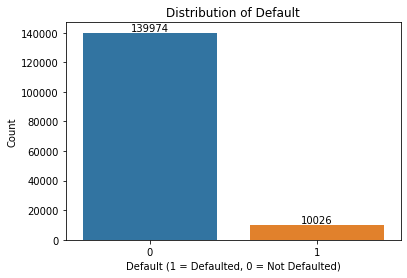

In [184]:
sns.countplot(x='Default', data=df)
plt.title("Distribution of Default")
plt.xlabel("Default (1 = Defaulted, 0 = Not Defaulted)")
plt.ylabel("Count")

# Adding count numbers on top of bars
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  # Adjust the position above the bar
        int(bar.get_height()),
        ha='center', va='bottom'
    )

plt.show()

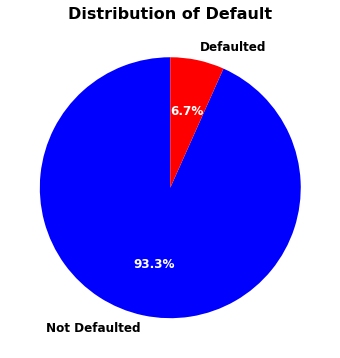

In [185]:
import matplotlib.pyplot as plt

# Assuming you have the counts from your data
counts = [139974, 10026]  # Replace with your actual counts
labels = ['Not Defaulted', 'Defaulted']

# Define a custom function to format the percentage text
def autopct_white(pct):
    return f'{pct:.1f}%'

# Creating the pie chart with Democratic and Republican colors
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=labels, 
    autopct=autopct_white, 
    startangle=90, 
    colors=['blue', 'red'], 
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Set the percentage text color to white
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Distribution of Default", fontsize=16, fontweight='bold')
plt.show()

/opt/ohpc/pub/apps/python/3.8.12/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/ohpc/pub/apps/python/3.8.12/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


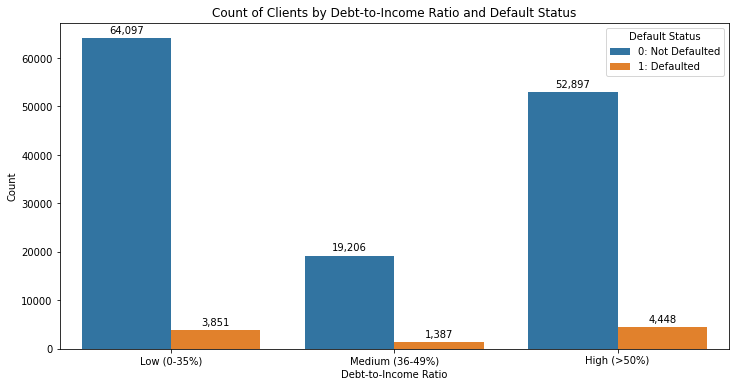

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 432x288 with 0 Axes>

In [407]:
df['Debt_to_Income_Bin'] = pd.cut(
    df['Prct_deuda_vs_ingresos'],
    bins=[0, .35, 0.49, float('inf')],  # Realistic thresholds
    labels=['Low (0-35%)', 'Medium (36-49%)', 'High (>50%)'])
# Bar plot for Debt-to-Income Ratio by Default
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Debt_to_Income_Bin', hue='Default', data=df)
plt.title("Count of Clients by Debt-to-Income Ratio and Default Status")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Count")
for container in ax.containers:
    # Safely handle NaN values in the bar labels
    labels = [f'{int(value):,}' if not np.isnan(value) else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)
plt.legend(
    title="Default Status",
    labels=["0: Not Defaulted", "1: Defaulted"],
    loc='upper right')
plt.show()
plt.savefig(dpi=300)

In [ ]:
# # Binning Monthly Income in actual dollar ranges
# df['Income_Category'] = pd.cut(
#     df['Mto_ingreso_mensual'],
#     bins=[0, 2000, 4000, 6000, 10000, float('inf')],
#     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
# )

# # Bar plot for Income Category by Default
# plt.figure(figsize=(12, 6))
# ax = sns.countplot(x='Income_Category', hue='Default', data=df)
# plt.title("Count of Clients by Monthly Income Category and Default Status")
# plt.xlabel("Income Category")
# plt.ylabel("Count")

# # Add count labels on top of each bar with commas
# for container in ax.containers:
#     # Format labels with commas
#     labels = [f'{int(value):,}' if value else '' for value in container.datavalues]
#     ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)

# # Customizing the legend with color-coded descriptions
# plt.legend(
#     title="Default Status",
#     labels=["0: Not Defaulted", "1: Defaulted"],
#     loc='upper right'
# )

# plt.show()

In [ ]:
# Binning Monthly Income into realistic U.S.-based bins
df['Income_Category'] = pd.cut(
    df['Mto_ingreso_mensual'],
    bins = [0, 2500, 4800, 7800, 12750, float('inf')],
    labels = ['Very Low ($0-$2.5K)', 
    'Low ($2.5K-$4.8K)', 
    'Medium ($4.8K-$7.8K)', 
    'High ($7.8K-$12.75K)', 
    'Very High (>$12.75K)'])
# Bar plot for Income Category by Default
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Income_Category', hue='Default', data=df)
plt.title("Count of Clients by Monthly Income Category and Default Status")
plt.xlabel("Income Category")
plt.ylabel("Count")
# Add count labels on top of each bar with commas
for container in ax.containers:
    # Format labels with commas
    labels = [f'{int(value):,}' if not np.isnan(value) else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)
# Customizing the legend with color-coded descriptions
plt.legend(
    title="Default Status",
    labels=["0: Not Defaulted", "1: Defaulted"],
    loc='upper right')
plt.show()

In [ ]:
# Plot 3: Boxplot (Age Distribution by Default)
sns.boxplot(x='Default', y='Edad', data=df)

plt.title("Age Distribution by Default Status")
plt.xlabel("Default (1 = Defaulted, 0 = Not Defaulted)")
plt.ylabel("Age")
plt.show()

In [ ]:
# # Box plot for Percentage of Credit Card Usage by Default Status
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Default', y='Prct_uso_tc', data=df)
# plt.title("Percentage of Credit Card Usage by Default Status")
# plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
# plt.ylabel("Percentage of Credit Card Usage")
# plt.show()


In [ ]:
# Binning Age into groups
df['Age_Group'] = pd.cut(
    df['Edad'],
    bins=[18, 29, 39,49, 59, 69, float('inf')],
    labels=['18–29', '30-39', '40–49','50-59','60-69', '70+']
)

# Bar plot for Age Groups by Default Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Default', data=df)
plt.title("Default Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Default Status", labels=["0: Not Defaulted", "1: Defaulted"])
plt.show()


In [ ]:
avg_delayed_loans = df.groupby('Default')['Nro_prestao_retrasados'].mean()

plt.figure(figsize=(12, 6))
avg_delayed_loans.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Delayed Loans (>3 Months) by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Average Number of Delayed Loans")
plt.xticks(rotation=0)
plt.show()

In [ ]:
avg_financial_products = df.groupby('Default')['Nro_prod_financieros_deuda'].mean()

plt.figure(figsize=(12, 6))
avg_financial_products.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Financial Products by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Average Number of Financial Products")
plt.xticks(rotation=0)
plt.show()

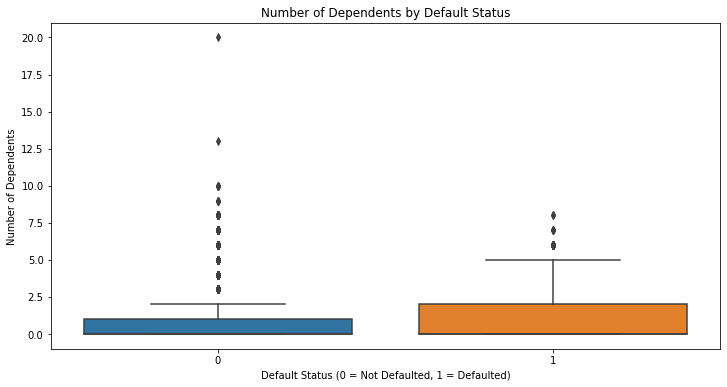

In [408]:
# Box plot for Number of Dependents by Default Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Nro_dependiente', data=df)
plt.title("Number of Dependents by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Number of Dependents")
plt.show()


In [ ]:
df[df['Default'] == 0]['Nro_dependiente'].describe()

In [ ]:
df[df['Default'] == 1]['Nro_dependiente'].describe()

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Default', y='Prct_uso_tc', data=df, palette='coolwarm')
# plt.title("Percentage of Credit Card Usage by Default Status", fontsize=16)
# plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
# plt.ylabel("Percentage of Credit Card Usage", fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [187]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# sns.boxplot(ax=axes[0], x='Default', y='Prct_uso_tc', data=df, palette='coolwarm')
# axes[0].set_title("Percentage of Credit Card Usage by Default Status", fontsize=14)
# axes[0].set_xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
# axes[0].set_ylabel("Percentage of Credit Card Usage")
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# avg_delayed_loans = df.groupby('Default')['Nro_prestao_retrasados'].mean()
# avg_delayed_loans.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'], edgecolor='black')
# axes[1].set_title("Average Number of Delayed Loans (>3 Months)", fontsize=14)
# axes[1].set_xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
# axes[1].set_ylabel("Average Number of Delayed Loans")
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

In [311]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# sns.countplot(ax=axes[0], x='Age_Group', hue='Default', data=df, palette='Set2')
# axes[0].set_title("Default Status by Age Group", fontsize=14)
# axes[0].set_xlabel("Age Group")
# axes[0].set_ylabel("Count")
# axes[0].legend(title="Default Status", labels=["0: Not Defaulted", "1: Defaulted"], fontsize=10)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# sns.boxplot(ax=axes[1], x='Default', y='Nro_dependiente', data=df, palette='husl')
# axes[1].set_title("Number of Dependents by Default Status", fontsize=14)
# axes[1].set_xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
# axes[1].set_ylabel("Number of Dependents")
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
avg_financial_products = df.groupby('Default')['Nro_prod_financieros_deuda'].mean()
avg_financial_products.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title("Average Number of Financial Products by Default Status", fontsize=16)
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
plt.ylabel("Average Number of Financial Products", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Clusterring

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

numeric_cols = ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos', 
                'Mto_ingreso_mensual', 'Nro_prod_financieros_deuda', 
                'Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']

df_numeric = df[numeric_cols].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df_numeric['Cluster'] = clusters
pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_data)

# Create a dataframe for plotting
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100, edgecolor='black')
plt.title("K-Means Clustering (PCA Projection)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


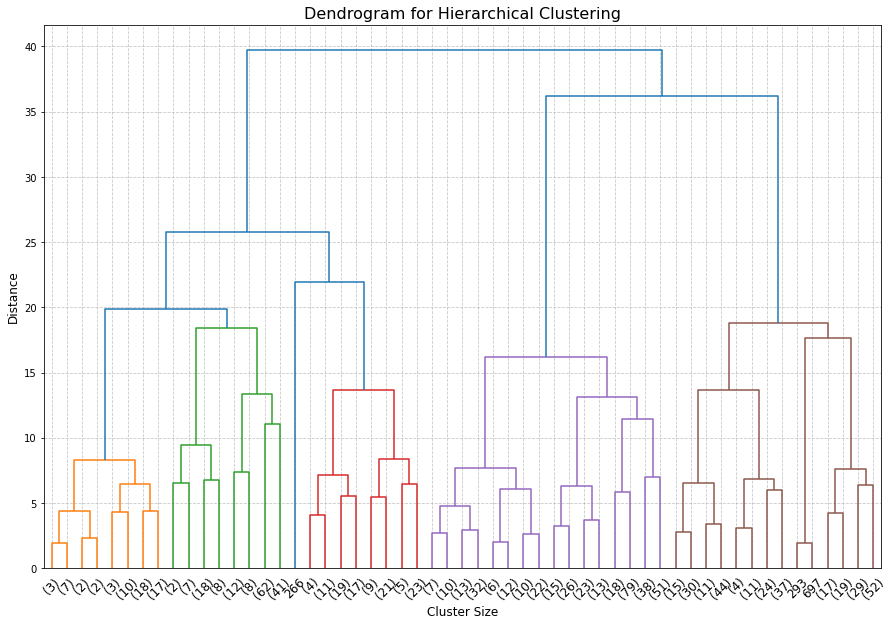

In [189]:
sampled_data = scaled_data[:1000] if scaled_data.shape[0] > 1000 else scaled_data  # Sample for large data
linked = linkage(sampled_data, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=45, leaf_font_size=12, color_threshold=0.5 * np.max(linked[:, 2]))
plt.title("Dendrogram for Hierarchical Clustering", fontsize=16)
plt.xlabel("Cluster Size", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# from sklearn.metrics import silhouette_score

# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(scaled_data)
#     score = silhouette_score(scaled_data, labels)
#     print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.9317910326846138


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Perform silhouette analysis for a range of cluster numbers
# silhouette_scores = []
# k_range = range(2, 11)  # Evaluate k from 2 to 10

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(scaled_data)  # scaled_data is your standardized dataset
#     score = silhouette_score(scaled_data, labels)
#     silhouette_scores.append(score)

# # Plot silhouette scores for each k
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
# plt.title("Silhouette Analysis for Optimal k", fontsize=14)
# plt.xlabel("Number of Clusters (k)", fontsize=12)
# plt.ylabel("Silhouette Score", fontsize=12)
# plt.xticks(k_range)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Find and print the optimal k with the highest silhouette score
# optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
# print(f"Optimal number of clusters based on silhouette score: {optimal_k}")


In [120]:
# from sklearn.metrics import silhouette_score, silhouette_samples
# import numpy as np

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(scaled_data, clusters_agg)
# print(f"Silhouette Score: {silhouette_avg:.2f}")

# # Calculate silhouette values for each sample
# silhouette_vals = silhouette_samples(scaled_data, clusters_agg)

# # Plot silhouette scores for each cluster
# plt.figure(figsize=(10, 8))
# y_lower = 10
# for i in range(optimal_clusters):
#     ith_cluster_silhouette_vals = silhouette_vals[clusters_agg == i]
#     ith_cluster_silhouette_vals.sort()
#     size_cluster_i = ith_cluster_silhouette_vals.shape[0]
#     y_upper = y_lower + size_cluster_i

#     plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
#     plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#     y_lower = y_upper + 10

# plt.axvline(x=silhouette_avg, color="red", linestyle="--")
# plt.title("Silhouette Plot for DIANA Clustering")
# plt.xlabel("Silhouette Coefficient Values")
# plt.ylabel("Cluster")
# plt.show()


### Classifications

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer


In [191]:
# Selecting the identified features and the target variable
selected_features = ['Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual', 'Edad', 
                     'Nro_prestao_retrasados', 'Nro_dependiente', 'Prct_uso_tc']
target = 'Default'

# Handling missing values with imputation
imputer = SimpleImputer(strategy='mean')
df[selected_features] = imputer.fit_transform(df[selected_features])

# Splitting into features (X) and target variable (y)
X = df[selected_features]
y = df[target]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [192]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("----- Decision Tree -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

----- Decision Tree -----
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     28044
           1       0.20      0.23      0.22      1956

    accuracy                           0.89     30000
   macro avg       0.57      0.58      0.58     30000
weighted avg       0.90      0.89      0.89     30000



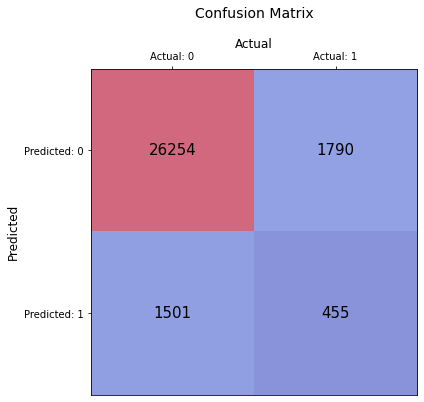

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train and predict using the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create a custom confusion matrix plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap='coolwarm', alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size=15)

# Customize axes and labels
ax.set_title("Confusion Matrix", pad=20, fontsize=14)
ax.set_xlabel("Actual", fontsize=12)
ax.set_ylabel("Predicted", fontsize=12)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xticks(range(len(np.unique(y_test))))
ax.set_yticks(range(len(np.unique(y_test))))
ax.set_xticklabels([f"Actual: {i}" for i in np.unique(y_test)])
ax.set_yticklabels([f"Predicted: {i}" for i in np.unique(y_test)])
plt.show()


### Random Forest Classifier

In [194]:
# Building and training a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9347666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.50      0.11      0.19      1956

    accuracy                           0.93     30000
   macro avg       0.72      0.55      0.58     30000
weighted avg       0.91      0.93      0.92     30000



### Naive Bayes Classifier

In [195]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("----- Naive Bayes -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


----- Naive Bayes -----
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     28044
           1       0.30      0.03      0.06      1956

    accuracy                           0.93     30000
   macro avg       0.62      0.51      0.51     30000
weighted avg       0.90      0.93      0.91     30000



### Support Vector Machine Classifier

In [33]:
# # Support Vector Machine Classifier
# from sklearn.svm import SVC

# # Initialize and train the model
# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train, y_train)

# # Make predictions
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate the model
# print("----- SVM -----")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
# print("Classification Report:\n", classification_report(y_test, y_pred_svm))


----- SVM -----
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.78      0.01      0.02      1956

    accuracy                           0.94     30000
   macro avg       0.86      0.50      0.49     30000
weighted avg       0.93      0.94      0.90     30000



In [196]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# # Scale your data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['linear', 'rbf']
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     SVC(random_state=42),
#     param_grid,
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     return_train_score=True  # Include training scores
# )

# # Fit the model
# grid_search.fit(X_train_scaled, y_train)


In [ ]:
# import pandas as pd

# # Convert the cv_results_ dictionary to a pandas DataFrame
# results_df = pd.DataFrame(grid_search.cv_results_)


In [ ]:
# import matplotlib.pyplot as plt

# # Filter results for the linear kernel
# linear_results = results_df[results_df['param_kernel'] == 'linear']

# # Plot mean test score vs. C
# plt.figure(figsize=(8, 6))
# plt.plot(
#     linear_results['param_C'].astype('float'),
#     linear_results['mean_test_score'],
#     marker='o'
# )
# plt.xscale('log')
# plt.xlabel('C (Regularization Parameter)', fontsize=12)
# plt.ylabel('Mean Cross-Validated Accuracy', fontsize=12)
# plt.title('SVM Performance vs. C (Linear Kernel)', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


In [ ]:
# import seaborn as sns
# import numpy as np

# # Filter results for the RBF kernel
# rbf_results = results_df[results_df['param_kernel'] == 'rbf']

# # Pivot the DataFrame to create a matrix for heatmap
# pivot_table = rbf_results.pivot(
#     index='param_gamma',
#     columns='param_C',
#     values='mean_test_score'
# )

# # Convert parameter values to float
# pivot_table.index = pivot_table.index.astype('float')
# pivot_table.columns = pivot_table.columns.astype('float')

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(
#     pivot_table,
#     annot=True,
#     fmt=".3f",
#     cmap='viridis',
#     cbar_kws={'label': 'Mean CV Accuracy'}
# )
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('C (Regularization Parameter)', fontsize=12)
# plt.ylabel('Gamma (Kernel Coefficient)', fontsize=12)
# plt.title('SVM Performance Heatmap (RBF Kernel)', fontsize=14)
# plt.show()


### K-Nearest Neighbors Classifier

In [32]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("----- KNN -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


----- KNN -----
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     28044
           1       0.28      0.04      0.08      1956

    accuracy                           0.93     30000
   macro avg       0.61      0.52      0.52     30000
weighted avg       0.89      0.93      0.91     30000



## All together

In [ ]:
# # Importing required libraries
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Initializing classifiers
# classifiers = {
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Naive Bayes': GaussianNB(),
#     'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
#     'SVM': SVC(kernel='linear', random_state=42),
#     'KNN': KNeighborsClassifier(n_neighbors=5)
# }

# # Training and evaluating classifiers
# for name, classifier in classifiers.items():
#     print(f"--- {name} ---")
    
#     # Train the model
#     classifier.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = classifier.predict(X_test)
    
#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy: {accuracy:.2f}")
#     print("Classification Report:\n", classification_report(y_test, y_pred))
#     print("\n")


### ASSOCIATION RULES​

In [391]:
# Discretize continuous variables into bins
df['income_bin'] = pd.cut(df['Mto_ingreso_mensual'], bins=[0, 2500, 4800, 7800, 12750, float('inf')], 
                          labels=['Very Low', 'Low', 'Medium', 'High','Very High'])
# df['Mto_ingreso_mensual_bin'] = pd.cut(df['Mto_ingreso_mensual'], bins=[0, 5000, 20000, 100000], labels=['Low Income', 'Middle Income', 'High Income'])

# Debug: Check the discretized columns
df['income_bin'].head()


0         High
1          Low
2          Low
3          Low
4    Very High
Name: income_bin, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [392]:
df['income_bin'].unique()

['High', 'Low', 'Very High', NaN, 'Very Low', 'Medium']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [393]:
# Transform the dataset into a transactional-style format
df_transactions = pd.get_dummies(
    df[['income_bin', 'Default']],
    prefix='', prefix_sep=''
)

# Debug: Verify the transaction format|
df_transactions.head()


,Default,Very Low,Low,Medium,High,Very High
0,1,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [404]:
# Apply Apriori with lower thresholds
frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)
frequent_itemsets['num_itemsets'] = frequent_itemsets['itemsets'].apply(len)

# Generate rules with even lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2, num_itemsets=frequent_itemsets['num_itemsets'])

# Display the first few rules
rules.head()


/home/u21/fantacher/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


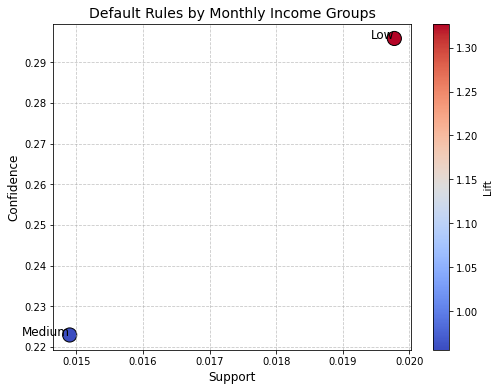

In [403]:
import matplotlib.pyplot as plt

# Prepare data for plotting
income_groups = ['Low', 'Medium']
rules_data_income = [
    {'Income Group': 'Low', 'Support': 0.019773, 'Confidence': 0.295831, 'Lift': 1.327381},
    {'Income Group': 'Medium', 'Support': 0.014900, 'Confidence': 0.222920, 'Lift': 0.955940},
]

# Convert to DataFrame
rules_df_income = pd.DataFrame(rules_data_income)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(rules_df_income['Support'], rules_df_income['Confidence'], c=rules_df_income['Lift'], cmap='coolwarm', s=200, edgecolor='black')
for i, row in rules_df_income.iterrows():
    plt.text(row['Support'], row['Confidence'], row['Income Group'], fontsize=12, ha='right')

# Add labels and color bar
plt.colorbar(label='Lift')
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.title('Default Rules by Monthly Income Groups', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### Age

In [367]:
# Discretize continuous variables into bins
df['Edad_bin'] = pd.cut(df['Edad'], bins=[18, 29, 49, 69, float('inf')], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
# df['Mto_ingreso_mensual_bin'] = pd.cut(df['Mto_ingreso_mensual'], bins=[0, 5000, 20000, 100000], labels=['Low Income', 'Middle Income', 'High Income'])

# Debug: Check the discretized columns
df[['Edad_bin']].head()


,Edad_bin
0,Middle-aged
1,Middle-aged
2,Middle-aged
3,Middle-aged
4,Middle-aged


In [382]:
df['Edad_bin'].unique()

['Middle-aged', 'Elderly', 'Senior', 'Young']
Categories (4, object): ['Young' < 'Middle-aged' < 'Senior' < 'Elderly']

In [383]:
# Transform the dataset into a transactional-style format
df_transactions = pd.get_dummies(
    df[['Edad_bin', 'Default']],
    prefix='', prefix_sep=''
)

# Debug: Verify the transaction format|
df_transactions.head()


,Default,Young,Middle-aged,Senior,Elderly
0,1,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [389]:
# Apply Apriori with lower thresholds
frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)
frequent_itemsets['num_itemsets'] = frequent_itemsets['itemsets'].apply(len)

# Generate rules with even lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2, num_itemsets=frequent_itemsets['num_itemsets'])

# Display the first few rules
rules.head()


/home/u21/fantacher/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Default),(Middle-aged),0.06684,0.383736,0.034754,0.519948,1.354964,1.0,0.009104,1.283745,0.280737,0.083578,0.221029,0.305257
1,(Default),(Senior),0.06684,0.428043,0.022187,0.331937,0.775476,1.0,-0.006424,0.856142,-0.236798,0.046937,-0.168030,0.191885


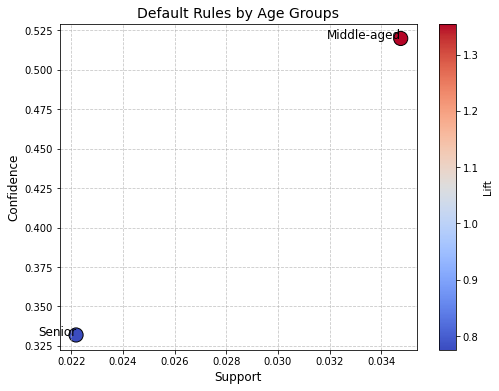

In [390]:
import matplotlib.pyplot as plt

# Prepare data for plotting
age_groups = ['Middle-aged', 'Senior']
rules_data = [
    {'Age Group': 'Middle-aged', 'Support': 0.034754, 'Confidence': 0.519948, 'Lift': 1.354964},
    {'Age Group': 'Senior', 'Support': 0.022187, 'Confidence': 0.331937, 'Lift': 0.775476},
]

# Convert to DataFrame
rules_df = pd.DataFrame(rules_data)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(rules_df['Support'], rules_df['Confidence'], c=rules_df['Lift'], cmap='coolwarm', s=200, edgecolor='black')
for i, row in rules_df.iterrows():
    plt.text(row['Support'], row['Confidence'], row['Age Group'], fontsize=12, ha='right')

# Add labels and color bar
plt.colorbar(label='Lift')
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.title('Default Rules by Age Groups', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
bins = [0, 0.5, 5, 20, float('inf')]  # Define bin edges
labels = ['No Delays', 'Few Delays', 'Many Delays', 'High Delays']  # Define categories
df['Nro_prestao_retrasados_bin'] = pd.cut(df['Nro_prestao_retrasados'], bins=bins, labels=labels, right=False)

# Verify the distribution
print(df['Nro_prestao_retrasados_bin'].value_counts())

In [410]:
bins = [0, 0.5, 5, 20, float('inf')]  # Define bin edges
labels = ['No Delays', 'Few Delays', 'Many Delays', 'High Delays']  # Define categories
df['Nro_prestao_retrasados_bin'] = pd.cut(df['Nro_prestao_retrasados'], bins=bins, labels=labels, right=False)
# Debug: Check the discretized columns
df['Nro_prestao_retrasados_bin'].head()


0    Few Delays
1     No Delays
2    Few Delays
3     No Delays
4    Few Delays
Name: Nro_prestao_retrasados_bin, dtype: category
Categories (4, object): ['No Delays' < 'Few Delays' < 'Many Delays' < 'High Delays']

In [415]:
# Transform the dataset into a transactional-style format
df_transactions = pd.get_dummies(
    df[['Edad_bin','income_bin', 'Default']],
    prefix='', prefix_sep=''
)

# Debug: Verify the transaction format|
df_transactions.head()


,Default,Young,Middle-aged,Senior,Elderly,Very Low,Low,Medium,High,Very High
0,1,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1


In [416]:
# Apply Apriori with lower thresholds
frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)
frequent_itemsets['num_itemsets'] = frequent_itemsets['itemsets'].apply(len)

# Generate rules with even lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2, num_itemsets=frequent_itemsets['num_itemsets'])

# Display the first few rules
rules.head()


/home/u21/fantacher/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Default),(Middle-aged),0.06684,0.383736,0.034754,0.519948,1.354964,1.0,0.009104,1.283745,0.280737,0.083578,0.221029,0.305257
1,(Default),(Senior),0.06684,0.428043,0.022187,0.331937,0.775476,1.0,-0.006424,0.856142,-0.236798,0.046937,-0.168030,0.191885
2,(Default),(Low),0.06684,0.222868,0.019773,0.295831,1.327381,1.0,0.004877,1.103615,0.264303,0.073253,0.093887,0.192277
3,(Default),(Medium),0.06684,0.233195,0.014900,0.222920,0.955940,1.0,-0.000687,0.986778,-0.047067,0.052256,-0.013399,0.143408
4,(Young),(Very Low),0.05880,0.109847,0.022373,0.380499,3.463886,1.0,0.015914,1.436886,0.755745,0.152956,0.304051,0.292088


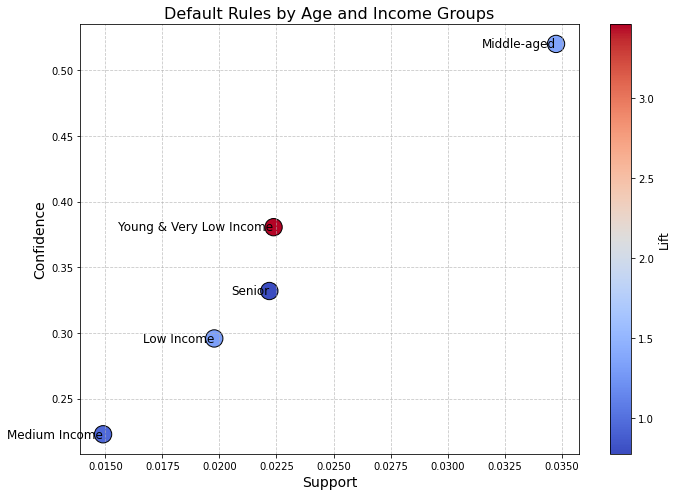

In [418]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from rules for Age Groups and Income Levels
rules_data_combined = [
    {'Category': 'Middle-aged', 'Support': 0.034754, 'Confidence': 0.519948, 'Lift': 1.354964},
    {'Category': 'Senior', 'Support': 0.022187, 'Confidence': 0.331937, 'Lift': 0.775476},
    {'Category': 'Low Income', 'Support': 0.019773, 'Confidence': 0.295831, 'Lift': 1.327381},
    {'Category': 'Medium Income', 'Support': 0.014900, 'Confidence': 0.222920, 'Lift': 0.955940},
    {'Category': 'Young & Very Low Income', 'Support': 0.022373, 'Confidence': 0.380499, 'Lift': 3.463886},
]

# Convert to DataFrame
rules_df_combined = pd.DataFrame(rules_data_combined)

# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    rules_df_combined['Support'], 
    rules_df_combined['Confidence'], 
    c=rules_df_combined['Lift'], 
    cmap='coolwarm', 
    s=300, 
    edgecolor='black'
)

# Annotate points with category names
for i, row in rules_df_combined.iterrows():
    plt.text(row['Support'], row['Confidence'], row['Category'], fontsize=12, ha='right', va='center')

# Add color bar for lift values
cbar = plt.colorbar(scatter)
cbar.set_label('Lift', fontsize=12)

# Add axis labels and title
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.title('Default Rules by Age and Income Groups', fontsize=16)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
